# HW 3: Optimization

## Optimization via Gradient Descent

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def gradient_descent(f, grad_f, x0, alpha, maxit=1000, tolf=1e-6, tolx=1e-6):
    k = 1  # Iterations counter
    xk = x0 - alpha * grad_f(x0)  # Iteration k point

    x = [x0, xk]
    f_val = [f(x0), f(xk)]
    norm_grad_0 = np.linalg.norm(grad_f(x0), 2)  # Norm of gradient of starting point
    grad_norm = [norm_grad_0, np.linalg.norm(grad_f(xk))]

    while (
        np.linalg.norm(grad_f(xk), 2) > tolf * norm_grad_0
        and np.linalg.norm(xk - x0, 2) > tolx
        and k < maxit
    ):
        k += 1
        x0 = xk  # Stores k-1 iteration point
        grad_f_xk = grad_f(xk)
        xk = xk - alpha * grad_f_xk  # Descent

        # Store results
        x.append(xk)
        f_val.append(f(xk))
        grad_norm.append(np.linalg.norm(grad_f_xk, 2))

    return x, k, f_val, grad_norm

In [35]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.

    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25

    while (
        f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2
    ):
        alpha = tau * alpha
    return alpha


def backtracking_gradient_descent(f, grad_f, x0, maxit=1000, tolf=1e-16, tolx=1e-6):
    k = 1  # Iterations counter
    alpha = backtracking(f, grad_f, x0)
    xk = x0 - alpha * grad_f(x0)  # Iteration k point

    x = [x0, xk]
    f_val = [f(x0), f(xk)]
    norm_grad_0 = np.linalg.norm(grad_f(x0), 2)  # Norm of gradient of starting point
    grad_norm = [norm_grad_0, np.linalg.norm(grad_f(xk))]

    while (
        np.linalg.norm(grad_f(xk), 2) > tolf * norm_grad_0
        and np.linalg.norm(xk - x0, 2) > tolx
        and k < maxit
    ):
        k += 1
        x0 = xk  # Stores k-1 iteration point
        alpha = backtracking(f, grad_f, xk)
        grad_f_xk = grad_f(xk)
        xk = xk - alpha * grad_f_xk  # Descent

        # Store results
        x.append(xk)
        f_val.append(f(xk))
        grad_norm.append(np.linalg.norm(grad_f_xk, 2))

    return x, k, f_val, grad_norm

### $f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2$

$f: \mathbb{R}^2 \to \mathbb{R}: f(x_1, x_2) = (x_1 - 3)^2 + (x_2 - 1)^2$  
$\nabla_x f(x)=(2 x_1 - 6, 2x_2 - 4)$  
$x^* = (3, 1)^T$, $f(x^*) = 0$

In [36]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1 - 3) ** 2 + (x2 - 1) ** 2


def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2 * x1 - 6, 2 * x2 - 2])


x_true = np.array([3, 1])

In [37]:
def plot_path_on_contour(x, x_true):
    x_cords = np.linspace(x_true[0] - 6, x_true[0] + 6, num=500)
    y_cords = np.linspace(x_true[1] - 6, x_true[1] + 6, num=500)
    X, Y = np.meshgrid(x_cords, y_cords)

    flattened_X = X.ravel()
    flattened_Y = Y.ravel()
    flattened_Z = np.zeros(len(flattened_X))
    for i in range(len(flattened_X)):
        flattened_Z[i] = f((flattened_X[i], flattened_Y[i]))

    Z = np.reshape(flattened_Z, X.shape)
    plt.contourf(X, Y, Z)
    plt.colorbar()
    plt.xlabel("x1")
    plt.ylabel("x2")

    plt.plot(
        [point[0] for point in x],
        [point[1] for point in x],
        "-o",
        c="orange",
        markersize=4,
        label="GD iterations",
    )
    plt.scatter(
        x_true[0],
        x_true[1],
        c="red",
        marker="*",
        s=100,
        label="Global minimum",
        zorder=2,
        alpha=0.4,
    )  # global minimum
    plt.legend()

    plt.show()

Gradient descent with alpha = 1 found [0. 0.] with 100 iterations; the true solution is [3 1]


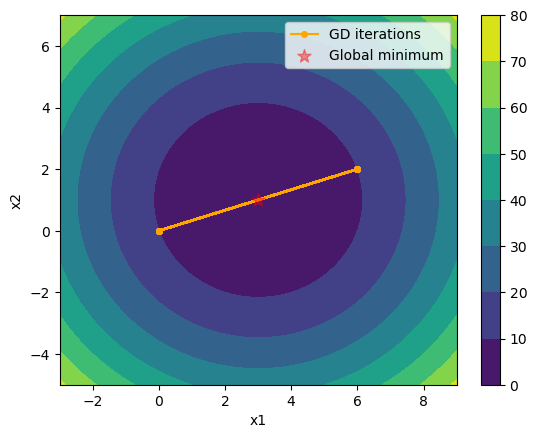

Gradient descent with alpha = 0.5 found [3. 1.] with 1 iterations; the true solution is [3 1]


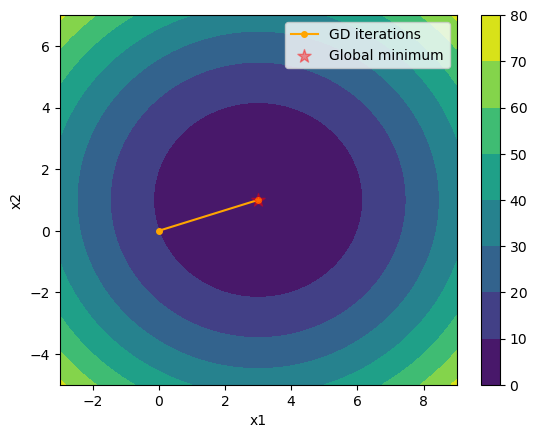

Gradient descent with alpha = 0.25 found [2.99997711 0.99999237] with 17 iterations; the true solution is [3 1]


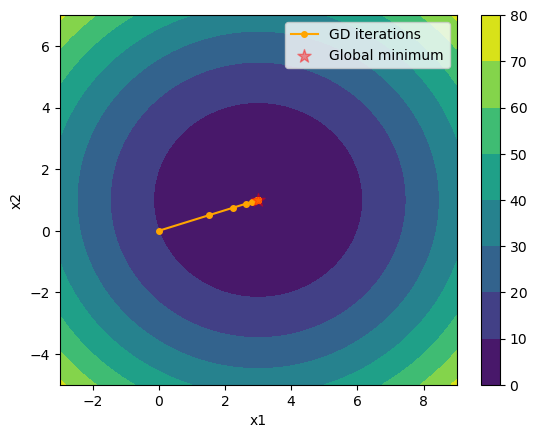

Gradient descent with alpha = 0.125 found [2.99997737 0.99999246] with 41 iterations; the true solution is [3 1]


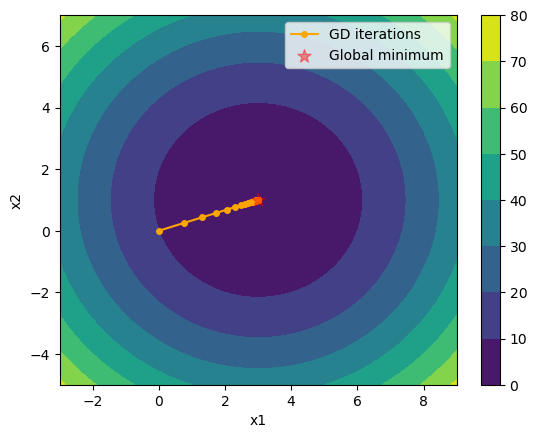

Gradient descent with backtracking found [2.99993978 0.99997993] with 81 iterations; the true solution is [3 1]


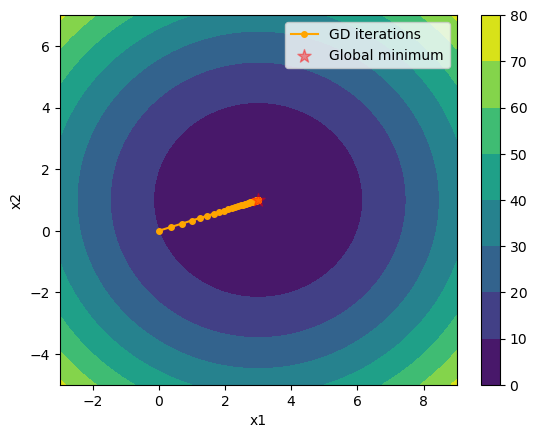

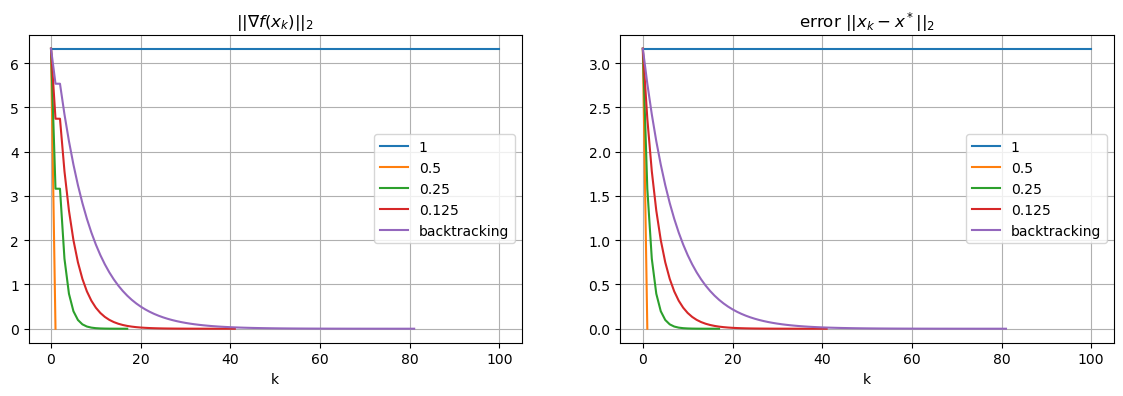

In [38]:
alphas = (1, 0.5, 0.25, 0.125)
xs = []  # Stores xk points for different alphas
grad_norms = []  # Stores gradient norms for different alphas
for alpha in alphas:
    x, k, f_val, grad_norm = gradient_descent(
        f, grad_f, x0=np.zeros(2), alpha=alpha, maxit=100, tolf=1e-5, tolx=1e-5
    )
    print(
        f"Gradient descent with alpha = {alpha} found {x[-1]} with {k} iterations; the true solution is {x_true}"
    )
    xs.append(x)
    grad_norms.append(grad_norm)
    plot_path_on_contour(x, x_true)

x, k, f_val, grad_norm = backtracking_gradient_descent(
    f, grad_f, x0=np.zeros(2), maxit=100, tolf=1e-5, tolx=1e-5
)
print(
    f"Gradient descent with backtracking found {x[-1]} with {k} iterations; the true solution is {x_true}"
)
plot_path_on_contour(x, x_true)

plt.figure(figsize=(14, 4))

# Plotting gradient norms
plt.subplot(1, 2, 1)
for i in range(len(alphas)):
    plt.plot(grad_norms[i], label=alphas[i])  # Grad_norm for alpha = alphas[i]

plt.plot(
    grad_norm, label="backtracking"
)  # Grad_norm for alpha picked by backtracking algorithm
plt.title(r"$||\nabla f(x_k)||_2$")
plt.xlabel("k")
plt.grid()
plt.legend()

# Plotting errors
plt.subplot(1, 2, 2)
for i in range(len(alphas)):
    plt.plot(
        [np.linalg.norm(xk - x_true, 2) for xk in xs[i]], label=alphas[i]
    )  # Error for alpha = alphas[i]
plt.plot(
    [np.linalg.norm(xk - x_true, 2) for xk in x], label="backtracking"
)  # Error for alpha picked by backtracking algorithm
plt.title(r"error $||x_k - x^*||_2$")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.show()

For $\alpha = 1$, GD, as shown in the contour plot, oscillated between two points so it failed to converge. With smaller values of $\alpha$, the algorithm converged to a solution. The fastest convergence speed was for $\alpha=0.5$, while the slowest was with backtracking.

### $f(x_1, x_2) = 10 (x_1 - 1)^2 + (x_2 - 2)^2$

$f(x_1, x_2) = 10 (x_1 - 1)^2 + (x_2 - 2)^2$  
$\nabla f(x) = (20x_1 - 20, 2x_2 -4)$  
$x^* = (1, 2)^T$

Gradient descent with alpha= 1 found [-7.50516242e+127  0.00000000e+000] with 100 iterations; the true solution is [1 2]
Gradient descent with alpha= 0.5 found [-2.65613989e+95  2.00000000e+00] with 100 iterations; the true solution is [1 2]
Gradient descent with alpha= 0.25 found [-1.60693804e+60  2.00000000e+00] with 100 iterations; the true solution is [1 2]
Gradient descent with alpha= 0.125 found [-4.06561178e+17  2.00000000e+00] with 100 iterations; the true solution is [1 2]
Gradient descent with alpha= 0.001 found [0.86738044 0.36286639] with 100 iterations; the true solution is [1 2]


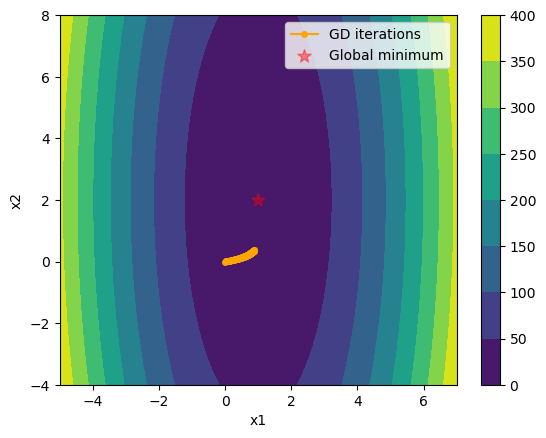

Gradient descent with backtracking found [1.         1.99990644] with 80 iterations; the true solution is [1 2]


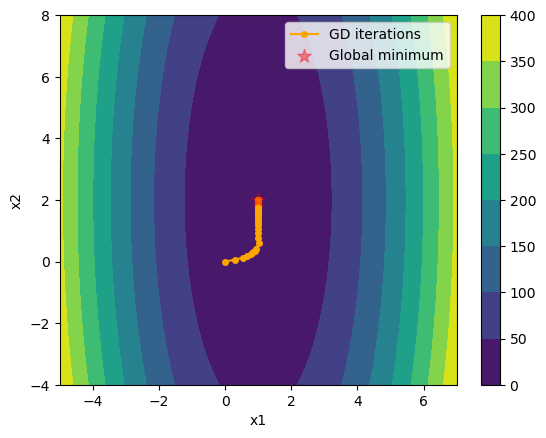

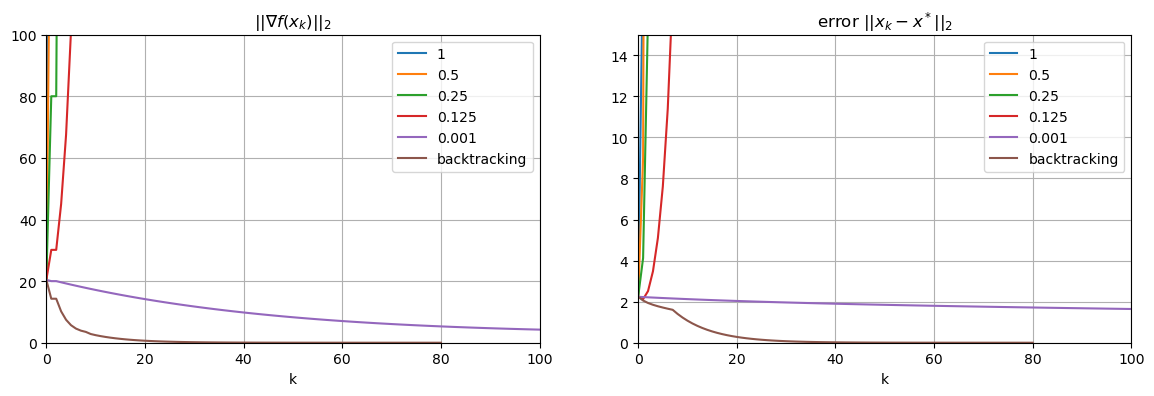

In [39]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10 * (x1 - 1) ** 2 + (x2 - 2) ** 2


def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20 * x1 - 20, 2 * x2 - 4])


x_true = np.array([1, 2])

alphas = (1, 0.5, 0.25, 0.125, 0.001)
xs = []  # Stores xk points for different alphas
grad_norms = []  # Stores gradient norms for different alphas
for alpha in alphas:
    x, k, f_val, grad_norm = gradient_descent(
        f, grad_f, x0=np.zeros(2), alpha=alpha, maxit=100, tolf=1e-5, tolx=1e-5
    )
    print(
        f"Gradient descent with alpha= {alpha} found {x[-1]} with {k} iterations; the true solution is {x_true}"
    )
    xs.append(x)
    grad_norms.append(grad_norm)
    if f_val[-1] < 100:  # Plotting non diverging iterations
        plot_path_on_contour(x, x_true)

x, k, f_val, grad_norm = backtracking_gradient_descent(
    f, grad_f, x0=np.zeros(2), maxit=100, tolf=1e-5, tolx=1e-5
)
print(
    f"Gradient descent with backtracking found {x[-1]} with {k} iterations; the true solution is {x_true}"
)
plot_path_on_contour(x, x_true)

plt.figure(figsize=(14, 4))

# Plotting gradient norms
plt.subplot(1, 2, 1)
for i in range(len(alphas)):
    plt.plot(grad_norms[i], label=alphas[i])  # Grad_norm for alpha = alphas[i]

plt.plot(
    grad_norm, label="backtracking"
)  # Grad_norm for alpha picked by backtracking algorithm
plt.title(r"$||\nabla f(x_k)||_2$")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.axis((0, 100, 0, 100))

# Plotting errors
plt.subplot(1, 2, 2)
for i in range(len(alphas)):
    plt.plot(
        [np.linalg.norm(xk - x_true, 2) for xk in xs[i]], label=alphas[i]
    )  # Error for alpha = alphas[i]
plt.plot(
    [np.linalg.norm(xk - x_true, 2) for xk in x], label="backtracking"
)  # Error for alpha picked by backtracking algorithm
plt.title(r"error $||x_k - x^*||_2$")
plt.xlabel("k")
plt.grid()
plt.legend()
plt.axis((0, 100, 0, 15))

plt.show()

The previous values of $\alpha$ were too big for the given function. As a result, not only did the algorithm fail to converge within the maximum allowed iterations, but the gradient norm and error also diverged, growing to very large values. This divergence occurred because the step size was too large, causing the algorithm to overshoot the minimum and move into regions far from the solution.  
I also tested a smaller $\alpha$ value of 0.001. With this step size, both the gradient norm and the error decreased steadily, indicating progress toward the solution. However, the progress was too slow, and the algorithm did not reach the minimum within the maximum iterations. This shows that $\alpha$=0.001 was too small for efficient convergence.  
Only gradient descent with backtracking, thanks to its dynamic choice of alpha, was able to converge to a good enough solution with 80 iterations.

### Least Squares Problem

$f(x) = \frac{1}{2}||Ax - b||^2_2$  
$\nabla f(x) = \frac{1}{2} \nabla ||Ax - b||^2_2 = \frac{1}{2}(2A^TAx - 2A^Tb) = A^TAx - A^Tb = A^T(Ax - b)$

Testing n = 5
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 100 iterations.


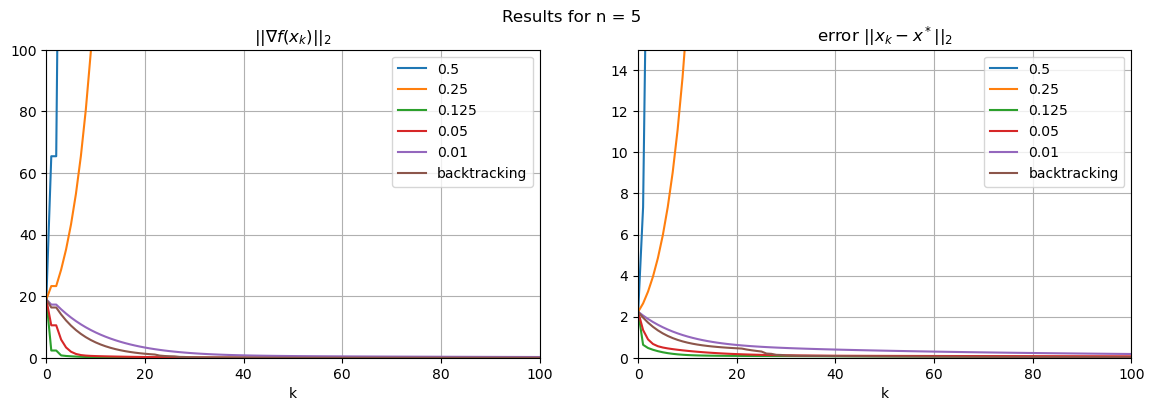

Testing n = 10
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 100 iterations.


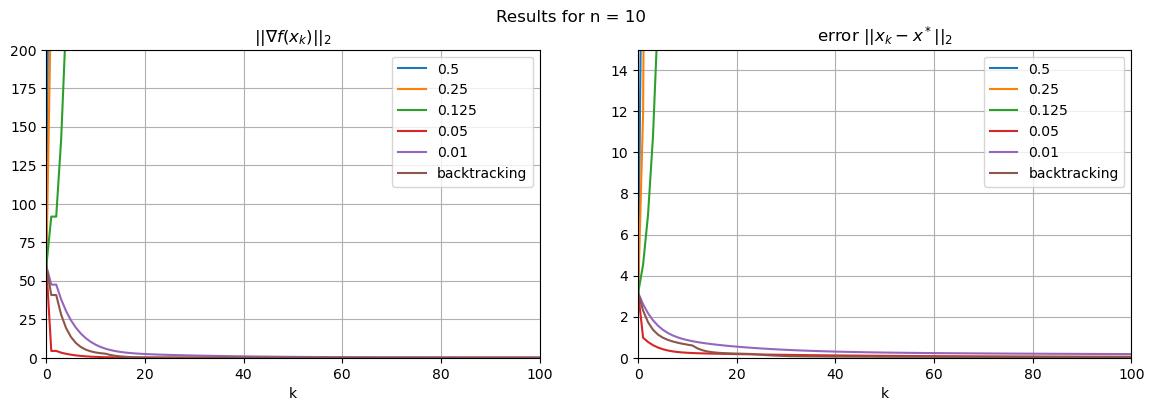

Testing n = 15
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 100 iterations.


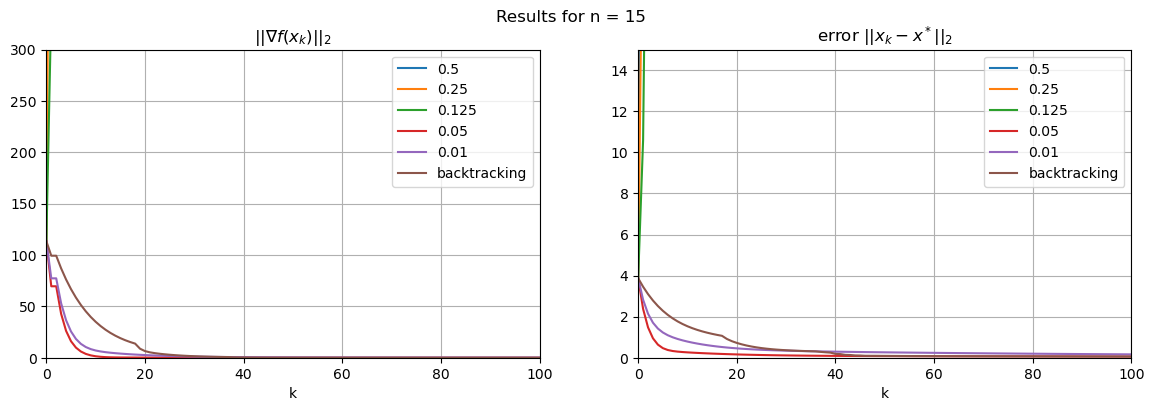

Testing n = 20
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 100 iterations.


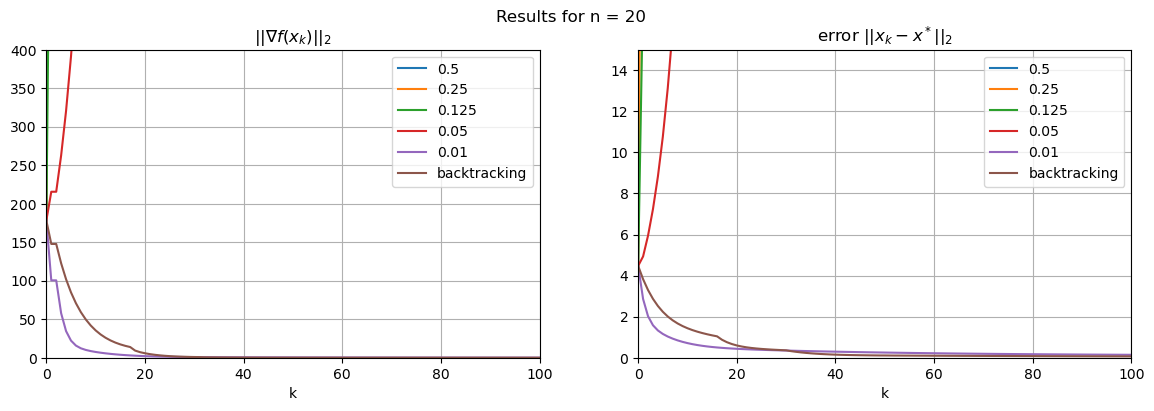

Testing n = 25
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 100 iterations.


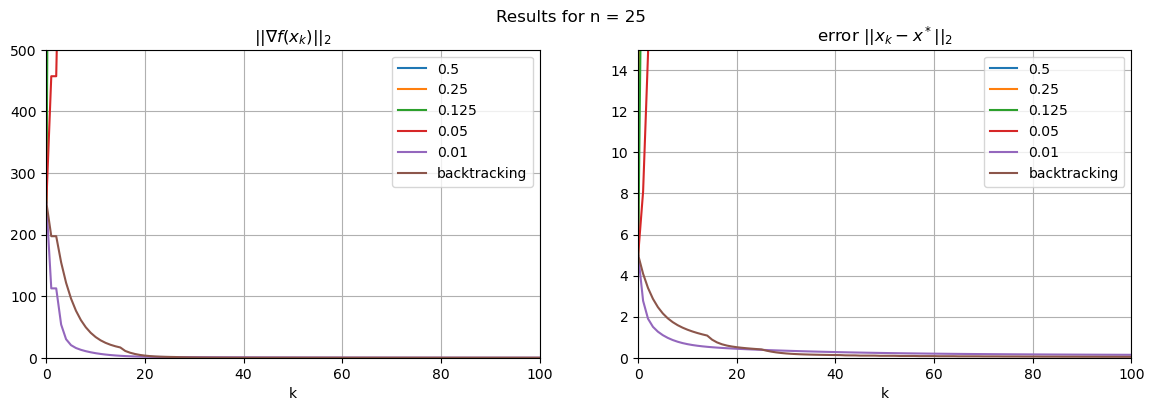

In [40]:
dims = (5, 10, 15, 20, 25)
for n in dims:
    print(f"Testing n = {n}")
    v = np.linspace(0, 1, num=n)  # n equally spaced values in the interval [0, 1]
    A = np.vander(v)  # Vandermonde matrix associated to v
    x_true = np.ones(n)
    b = A @ x_true

    def f(x):
        return 0.5 * (np.linalg.norm(A @ x - b, 2) ** 2)

    def grad_f(x):
        return A.T @ (A @ x - b)

    alphas = (0.5, 0.25, 0.125, 0.05, 0.01)
    xs = []  # Stores xk points for different alphas
    grad_norms = []  # Stores gradient norms for different alphas
    for alpha in alphas:
        x, k, f_val, grad_norm = gradient_descent(
            f, grad_f, x0=np.zeros(n), alpha=alpha, maxit=100, tolf=1e-5, tolx=1e-5
        )
        print(f"Gradient descent with alpha = {alpha} ended after {k} iterations.")
        xs.append(x)
        grad_norms.append(grad_norm)

    x, k, f_val, grad_norm = backtracking_gradient_descent(
        f, grad_f, x0=np.zeros(n), maxit=100, tolf=1e-5, tolx=1e-5
    )
    print(f"Gradient descent with backtracking ended after {k} iterations.")

    plt.figure(figsize=(14, 4))
    plt.suptitle(f"Results for n = {n}")

    # Plotting gradient norms
    plt.subplot(1, 2, 1)
    for i in range(len(alphas)):
        plt.plot(grad_norms[i], label=alphas[i])  # Grad_norm for alpha = alphas[i]

    plt.plot(
        grad_norm, label="backtracking"
    )  # Grad_norm for alpha picked by backtracking algorithm
    plt.title(r"$||\nabla f(x_k)||_2$")
    plt.xlabel("k")
    plt.grid()
    plt.legend()
    plt.axis((0, 100, 0, 20 * n))

    # Plotting errors
    plt.subplot(1, 2, 2)
    for i in range(len(alphas)):
        plt.plot(
            [np.linalg.norm(xk - x_true, 2) for xk in xs[i]], label=alphas[i]
        )  # Error for alpha = alphas[i]
    plt.plot(
        [np.linalg.norm(xk - x_true, 2) for xk in x], label="backtracking"
    )  # Error for alpha picked by backtracking algorithm
    plt.title(r"error $||x_k - x^*||_2$")
    plt.xlabel("k")
    plt.grid()
    plt.legend()
    plt.axis((0, 100, 0, 15))

    plt.show()

None of the GD runs were able to find a solution within the maximum number of iterations. For n = 5, the three smallest values of $\alpha$, as well as backtracking, successfully reduced the gradient norm and the error. However, for n = 10, $\alpha = 0.125$ became too large, and for n = 20, $\alpha = 0.05$ also became too large. These results suggest that least-squares problems of higher dimensions require smaller step sizes for gradient descent to be effective.

### MAP

$f(x) = \frac{1}{2} || Ax-b ||_2^2 + \frac{\lambda}{2} ||x||^2_2$  
$\nabla f(x) = A^T(Ax-b) + \lambda x$

Testing lambda = 0
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 100 iterations.


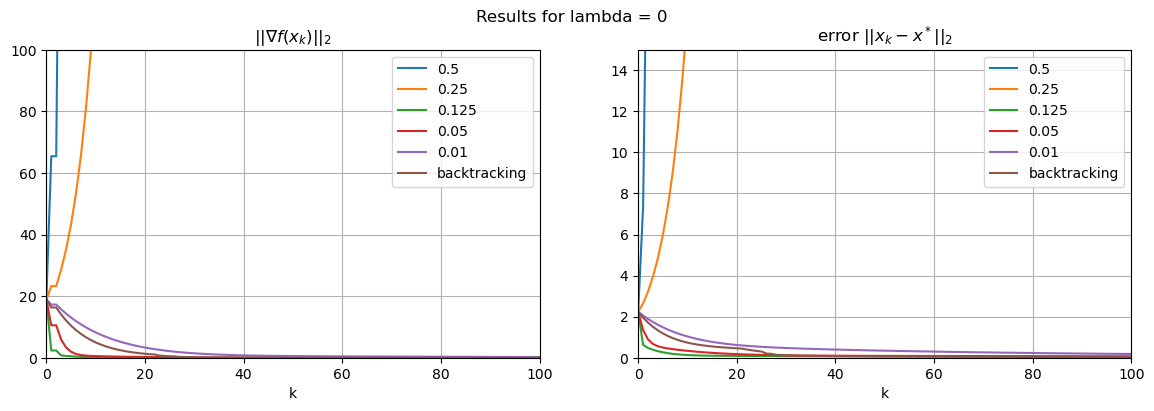

Testing lambda = 0.001
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 42 iterations.


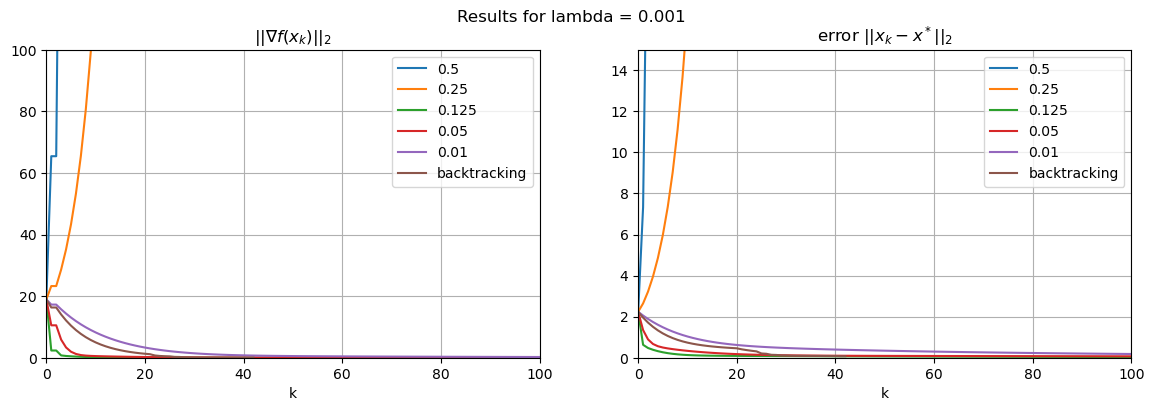

Testing lambda = 0.01
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 30 iterations.


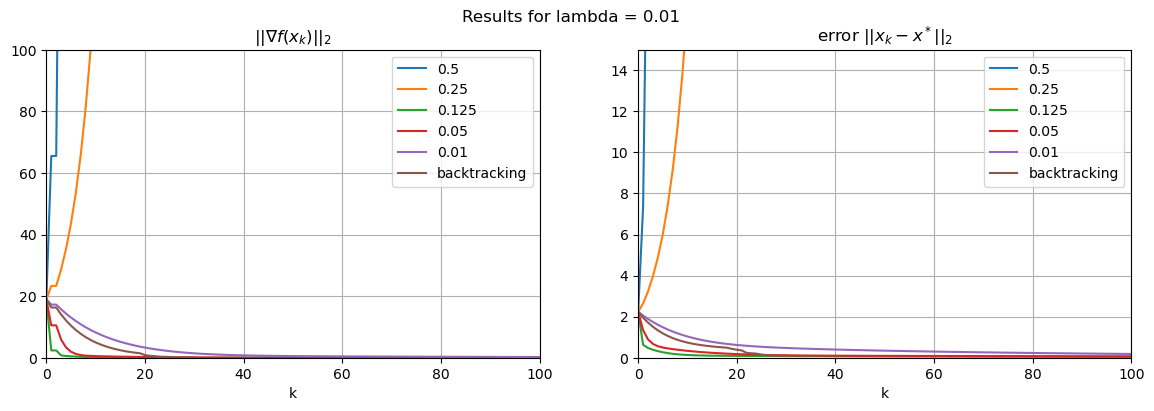

Testing lambda = 0.1
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 100 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 15 iterations.


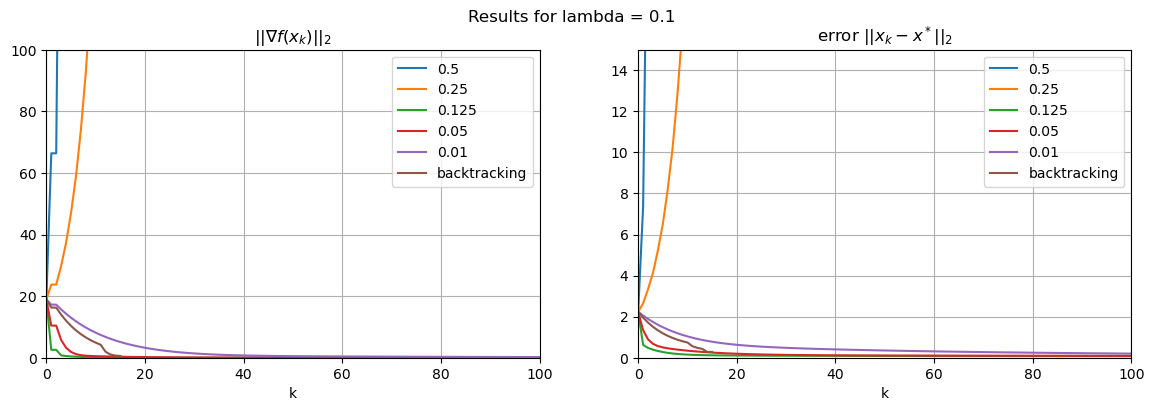

Testing lambda = 0.5
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 53 iterations.
Gradient descent with alpha = 0.05 ended after 100 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 7 iterations.


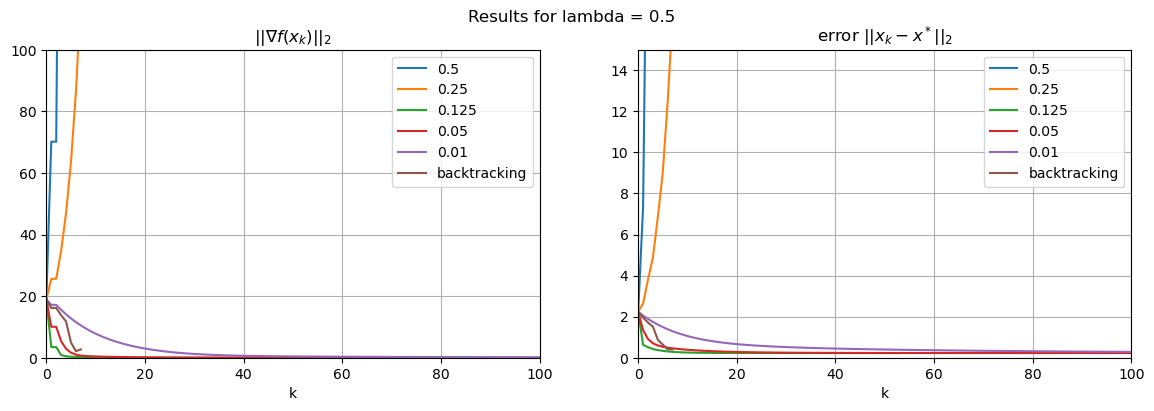

Testing lambda = 1
Gradient descent with alpha = 0.5 ended after 100 iterations.
Gradient descent with alpha = 0.25 ended after 100 iterations.
Gradient descent with alpha = 0.125 ended after 28 iterations.
Gradient descent with alpha = 0.05 ended after 74 iterations.
Gradient descent with alpha = 0.01 ended after 100 iterations.
Gradient descent with backtracking ended after 6 iterations.


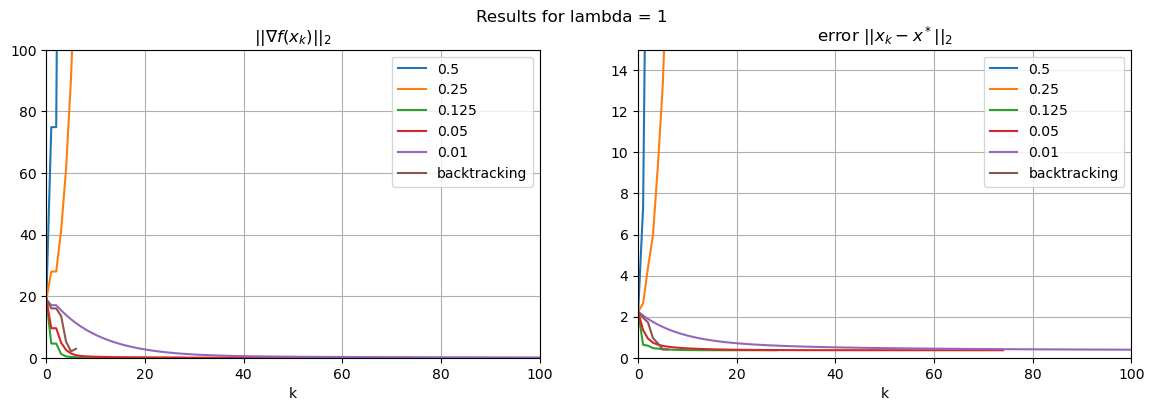

In [41]:
lambdas = (0, 0.001, 0.01, 0.1, 0.5, 1)
n = 5  # Fixed dimension
for l in lambdas:
    print(f"Testing lambda = {l}")
    v = np.linspace(0, 1, num=n)  # n equally spaced values in the interval [0, 1]
    A = np.vander(v)  # Vandermonde matrix associated to v
    x_true = np.ones(n)
    b = A @ x_true

    def f(x):
        return (
            0.5 * np.linalg.norm(A @ x - b, 2) ** 2
            - l * 0.5 * np.linalg.norm(x, 2) ** 2
        )

    def grad_f(x):
        return A.T @ (A @ x - b) + l * x

    alphas = (0.5, 0.25, 0.125, 0.05, 0.01)
    xs = []  # Stores xk points for different alphas
    grad_norms = []  # Stores gradient norms for different alphas
    for alpha in alphas:
        x, k, f_val, grad_norm = gradient_descent(
            f, grad_f, x0=np.zeros(n), alpha=alpha, maxit=100, tolf=1e-5, tolx=1e-5
        )
        print(f"Gradient descent with alpha = {alpha} ended after {k} iterations.")
        xs.append(x)
        grad_norms.append(grad_norm)

    x, k, f_val, grad_norm = backtracking_gradient_descent(
        f, grad_f, x0=np.zeros(n), maxit=100, tolf=1e-5, tolx=1e-5
    )
    print(f"Gradient descent with backtracking ended after {k} iterations.")

    plt.figure(figsize=(14, 4))
    plt.suptitle(f"Results for lambda = {l}")

    # Plotting gradient norms
    plt.subplot(1, 2, 1)
    for i in range(len(alphas)):
        plt.plot(grad_norms[i], label=alphas[i])  # Grad_norm for alpha = alphas[i]

    plt.plot(
        grad_norm, label="backtracking"
    )  # Grad_norm for alpha picked by backtracking algorithm
    plt.title(r"$||\nabla f(x_k)||_2$")
    plt.xlabel("k")
    plt.grid()
    plt.legend()
    plt.axis((0, 100, 0, 20 * n))

    # Plotting errors
    plt.subplot(1, 2, 2)
    for i in range(len(alphas)):
        plt.plot(
            [np.linalg.norm(xk - x_true, 2) for xk in xs[i]], label=alphas[i]
        )  # Error for alpha = alphas[i]
    plt.plot(
        [np.linalg.norm(xk - x_true, 2) for xk in x], label="backtracking"
    )  # Error for alpha picked by backtracking algorithm
    plt.title(r"error $||x_k - x^*||_2$")
    plt.xlabel("k")
    plt.grid()
    plt.legend()
    plt.axis((0, 100, 0, 15))

    plt.show()

For the chosen parameters, varying $\lambda$ did not result in any noticeable change.

### Polynomial: non-convex function

$f(x) = x^4 + x^3 -2x^2 -2x$  
$\nabla f(x) = 4 x^3 + 3x^2 - 4x - 2$  

In [42]:
def f(x):
    return x[0] ** 4 + x[0] ** 3 - 2 * x[0] ** 2 - 2 * x[0]


def grad_f(x):
    return np.array(4 * x[0] ** 3 + 3 * x[0] ** 2 - 4 * x - 2)

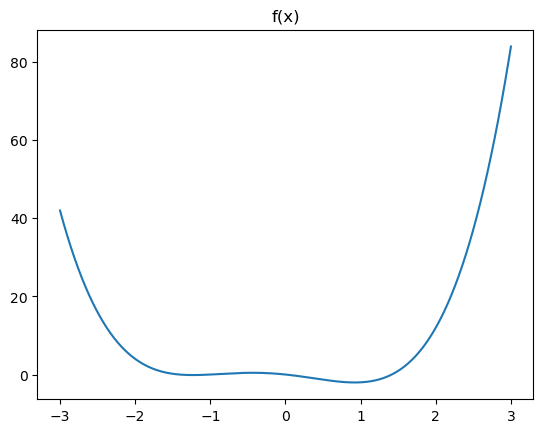

In [43]:
d = np.linspace(-3, 3, num=500)
plt.plot(d, [f(np.array([p])) for p in d])
plt.title("f(x)")
plt.show()

Testing starting point -3
Gradient descent with alpha = 0.2 found [-7.91011633e+244] with 6 iterations.
Gradient descent with alpha = 0.125 found [inf] with 7 iterations.
Gradient descent with alpha = 0.05 found [0.92219498] with 13 iterations.
Gradient descent with alpha = 0.01 found [-1.23252998] with 100 iterations.
Gradient descent with backtracking found [-1.23233765] with 80 iterations.


/tmp/ipykernel_126727/3772958913.py:2: RuntimeWarning: overflow encountered in scalar power
  return x[0] ** 4 + x[0] ** 3 - 2 * x[0] ** 2 - 2 * x[0]
/tmp/ipykernel_126727/3772958913.py:2: RuntimeWarning: invalid value encountered in scalar add
  return x[0] ** 4 + x[0] ** 3 - 2 * x[0] ** 2 - 2 * x[0]
/tmp/ipykernel_126727/3772958913.py:6: RuntimeWarning: overflow encountered in scalar power
  return np.array(4 * x[0] ** 3 + 3 * x[0] ** 2 - 4 * x - 2)
/tmp/ipykernel_126727/3772958913.py:6: RuntimeWarning: invalid value encountered in scalar add
  return np.array(4 * x[0] ** 3 + 3 * x[0] ** 2 - 4 * x - 2)
/tmp/ipykernel_126727/3772958913.py:2: RuntimeWarning: invalid value encountered in scalar subtract
  return x[0] ** 4 + x[0] ** 3 - 2 * x[0] ** 2 - 2 * x[0]
/tmp/ipykernel_126727/3772958913.py:6: RuntimeWarning: invalid value encountered in subtract
  return np.array(4 * x[0] ** 3 + 3 * x[0] ** 2 - 4 * x - 2)


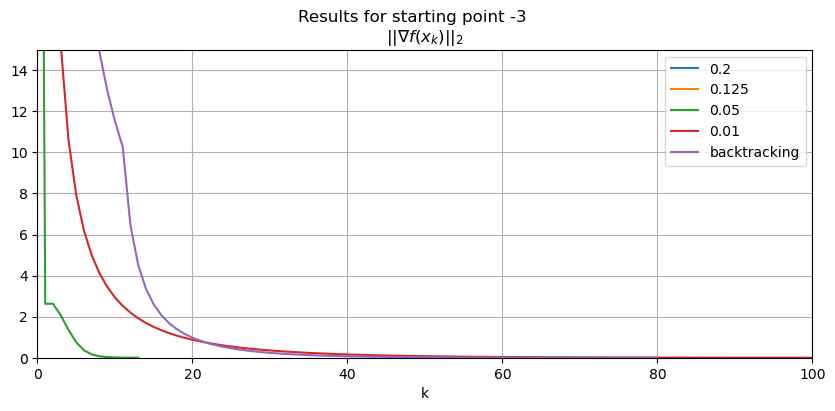

Testing starting point -2
Gradient descent with alpha = 0.2 found [1.09260302] with 100 iterations.
Gradient descent with alpha = 0.125 found [0.92221645] with 15 iterations.
Gradient descent with alpha = 0.05 found [-1.23226007] with 20 iterations.
Gradient descent with alpha = 0.01 found [-1.23248785] with 100 iterations.
Gradient descent with backtracking found [-1.23231705] with 75 iterations.


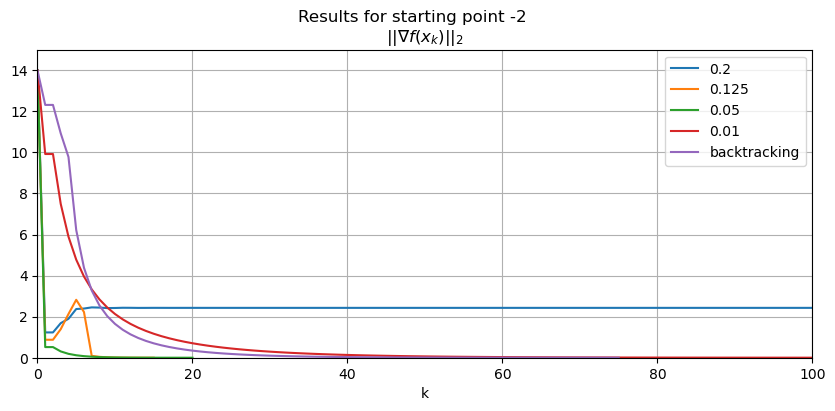

Testing starting point -1
Gradient descent with alpha = 0.2 found [-1.23223848] with 11 iterations.
Gradient descent with alpha = 0.125 found [-1.23223917] with 8 iterations.
Gradient descent with alpha = 0.05 found [-1.23222576] with 25 iterations.
Gradient descent with alpha = 0.01 found [-1.2319094] with 100 iterations.
Gradient descent with backtracking found [-1.23215902] with 54 iterations.


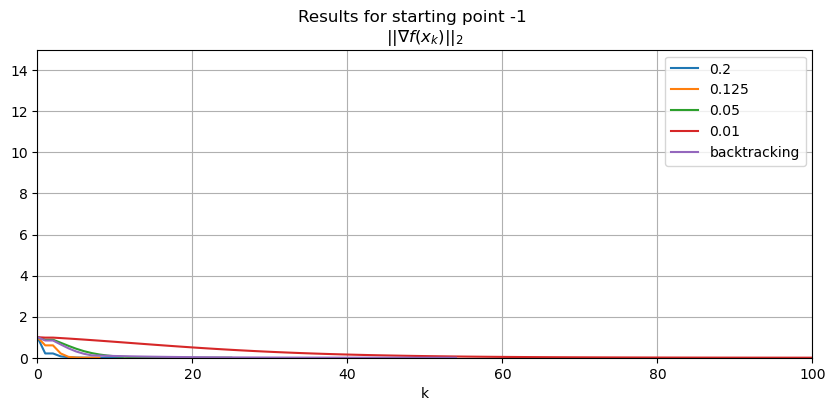

Testing starting point 0
Gradient descent with alpha = 0.2 found [1.09260302] with 100 iterations.
Gradient descent with alpha = 0.125 found [0.92222289] with 15 iterations.
Gradient descent with alpha = 0.05 found [0.92222185] with 19 iterations.
Gradient descent with alpha = 0.01 found [0.9221562] with 95 iterations.
Gradient descent with backtracking found [0.92218332] with 47 iterations.


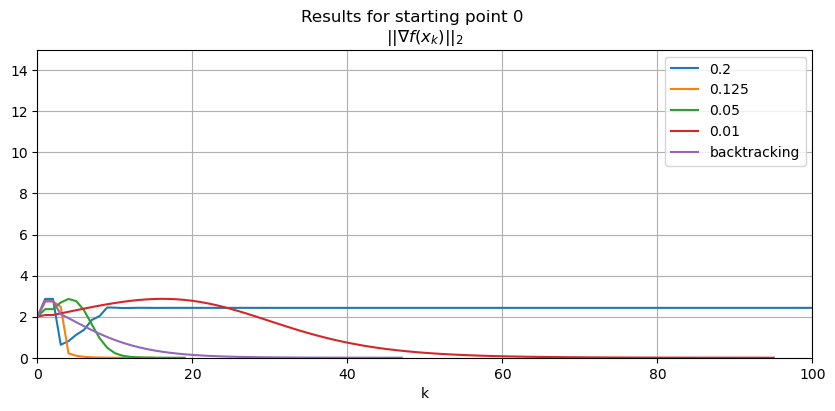

Testing starting point 2
Gradient descent with alpha = 0.2 found [-inf] with 7 iterations.
Gradient descent with alpha = 0.125 found [0.92220863] with 12 iterations.
Gradient descent with alpha = 0.05 found [0.92220063] with 15 iterations.
Gradient descent with alpha = 0.01 found [0.92229505] with 69 iterations.
Gradient descent with backtracking found [0.92226672] with 52 iterations.


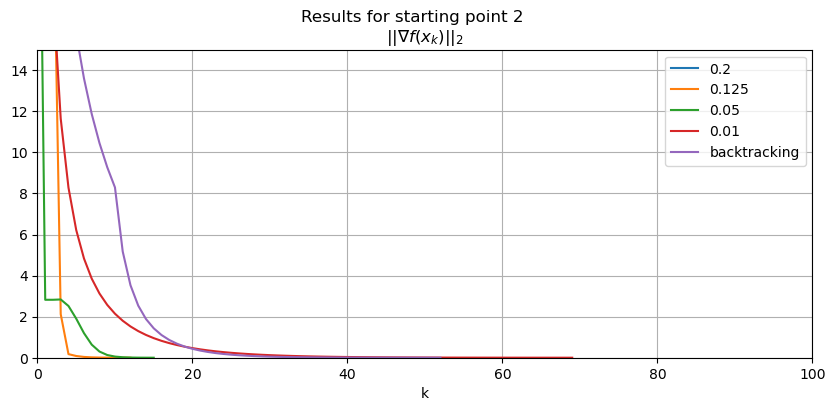

Testing starting point 2.5
Gradient descent with alpha = 0.2 found [-inf] with 7 iterations.
Gradient descent with alpha = 0.125 found [-inf] with 7 iterations.
Gradient descent with alpha = 0.05 found [-1.23214107] with 22 iterations.
Gradient descent with alpha = 0.01 found [0.9222999] with 69 iterations.
Gradient descent with backtracking found [0.92227669] with 53 iterations.


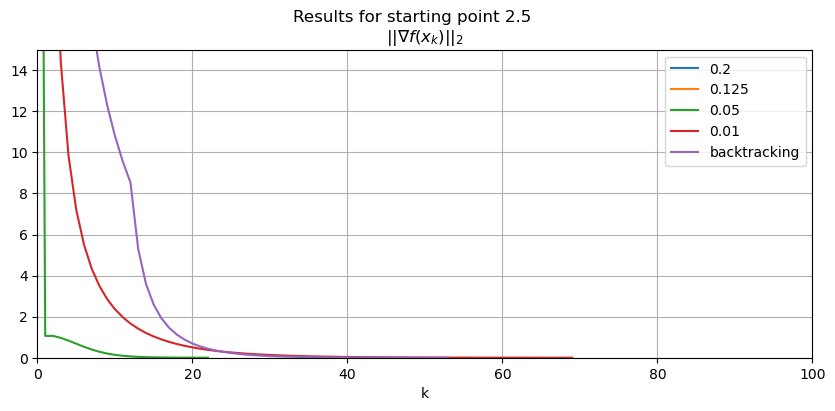

In [44]:
starting_points = (-3, -2, -1, 0, 2, 2.5)
x_true = np.array([-1])
for x0 in starting_points:
    print(f"Testing starting point {x0}")

    alphas = (0.2, 0.125, 0.05, 0.01)
    xs = []  # Stores xk points for different alphas
    grad_norms = []  # Stores gradient norms for different alphas
    for alpha in alphas:
        x, k, f_val, grad_norm = gradient_descent(
            f, grad_f, x0=np.array([x0]), alpha=alpha, maxit=100, tolf=1e-5, tolx=1e-5
        )
        print(
            f"Gradient descent with alpha = {alpha} found {x[-1]} with {k} iterations."
        )
        xs.append(x)
        grad_norms.append(grad_norm)

    x, k, f_val, grad_norm = backtracking_gradient_descent(
        f, grad_f, x0=np.array([x0]), maxit=100, tolf=1e-5, tolx=1e-5
    )
    print(f"Gradient descent with backtracking found {x[-1]} with {k} iterations.")

    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Results for starting point {x0}")

    # Plotting gradient norms
    for i in range(len(alphas)):
        plt.plot(grad_norms[i], label=alphas[i])  # Grad_norm for alpha = alphas[i]

    plt.plot(
        grad_norm, label="backtracking"
    )  # Grad_norm for alpha picked by backtracking algorithm
    plt.title(r"$||\nabla f(x_k)||_2$")
    plt.xlabel("k")
    plt.grid()
    plt.legend()
    plt.axis((0, 100, 0, 15))

    plt.show()

When the starting position is on a steep slope (where the gradient magnitude is high) and the step size is big enough, without causing divergence, the GD algorithm can "jump" to the neighboring valley. This is evident for $x_0 = -2$ were for both $\alpha = 0.2$ and $\alpha = 0.125$ the global minimum was found. Similarly, for $x_0 = 2.5$ and $\alpha = 0.05$, GD converged to the local minimum of the left valley despite starting from a position in the right valley.  
On the contrary, when the starting position is in a flatter region (small gradient magnitude), GD is not able to transition to a different valley. For for $x_0 = -1$ no learning rate enabled the convergence to the global minimum, GD converged to the local minimum, and for $x_0 = 0$ or 1, all tested values of $\alpha$ bring to a the global minimum.

## Optimization via Stochastic Gradient Descent

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [46]:
# Load data
data = pd.read_csv("data/poly_regression_large.csv")
X, y = data["x"], data["y"]

In [47]:
# Splitting data: train - test
def split_data(X, Y, train_size):
    N = len(X)
    N_train = int(train_size * N)

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:N_train]
    test_idx = idx[N_train:]

    X_train = X[train_idx]
    Y_train = Y[train_idx]

    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return X_train, X_test, Y_train, Y_test


X_train, X_test, y_train, y_test = split_data(
    np.array(X), np.array(y), train_size=0.8
)  # 80 : 20 train-test split

print(X_train.shape, X_test.shape)

(800,) (200,)


In [48]:
k = 3

In [49]:
def f(x, theta):  # Polynomial
    s = 0
    for i in range(len(theta)):
        s = s + theta[i] * x**i
    return s


def loss(theta, X, y):  # Mean square error (MSE)
    y_pred = np.zeros(X.shape[0])
    for i in range(len(X)):
        y_pred[i] = f(X[i], theta)
    error = np.square(y_pred - y)
    return np.mean(error)


def vandermonde(x, K):
    # Return Vandermonde matrix of degree K
    N = len(x)
    PhiX = np.zeros((K, N))
    for k in range(K):
        PhiX[k, :] = x**k
    return PhiX


def grad_loss(theta, X_batch, y_batch):
    X = vandermonde(X_batch, len(theta))  # (K, N) matrix
    gradient = 2 / len(X_batch) * X @ (X.T @ theta - y_batch)
    return gradient

In [50]:
# Stochastic Gradient Descent
def SGD(loss, grad_loss, D, theta0, alpha, batch_size, n_epochs):
    X, y = D  # Unpack the data
    N = X.shape[0]  # We assume both X and Y has shape (N, )
    d = theta0.shape[0]  # While theta0 has shape (d, )
    idx = np.arange(0, N)  # This is required for the shuffling

    # Initialization of history vectors
    theta_history = np.zeros((n_epochs, d))  # Save parameters at each epoch
    loss_history = np.zeros((n_epochs,))  # Save loss values at each epoch
    grad_norm_history = np.zeros((n_epochs,))  # Save gradient norms at each epoch

    # Initialize weights
    theta = theta0
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]

            # Compute the gradient of the loss
            gradient = grad_loss(theta, X_batch, y_batch)
            grad_loss_vec.append(np.linalg.norm(gradient, 2))

            # Update weights
            theta = theta - alpha * gradient

        # Save the updated values
        theta_history[epoch] = theta
        loss_history[epoch] = loss(theta, X, y)
        grad_norm_history[epoch] = np.mean(grad_loss_vec)

    return theta_history, loss_history, grad_norm_history

In [51]:
sgd_theta_history, sgd_loss_history, sgd_grad_norm_history = SGD(
    loss=loss,
    grad_loss=grad_loss,
    D=(np.array(X_train), np.array(y_train)),
    theta0=np.zeros(k),
    alpha=0.5,
    batch_size=100,
    n_epochs=3000,
)

In [52]:
def gradient_descent(f, grad_f, D, theta0, alpha, maxit=5000, tolf=1e-6, tolx=1e-6):
    k = 1  # Iterations counter
    X, y = D
    thetak = theta0 - alpha * grad_f(theta0, X, y)  # Iteration k point

    theta = [theta0, thetak]
    f_val = [f(theta0, X, y), f(thetak, X, y)]
    norm_grad_0 = np.linalg.norm(
        grad_f(theta0, X, y), 2
    )  # Norm of gradient of starting point
    grad_norm = [norm_grad_0, np.linalg.norm(grad_f(thetak, X, y))]

    while (
        np.linalg.norm(grad_f(thetak, X, y), 2) > tolf * norm_grad_0
        and np.linalg.norm(thetak - theta0, 2) > tolx
        and k < maxit
    ):
        k += 1
        theta0 = thetak  # Stores k-1 iteration point
        grad_f_thetak = grad_f(thetak, X, y)
        thetak = thetak - alpha * grad_f_thetak  # Descent

        # Store results
        theta.append(thetak)
        f_val.append(f(thetak, X, y))
        grad_norm.append(np.linalg.norm(grad_f_thetak, 2))

    return theta, k, f_val, grad_norm

In [53]:
gd_theta_history, _, f_val, grad_norm = gradient_descent(
    f=loss,
    grad_f=grad_loss,
    D=(np.array(X_train), np.array(y_train)),
    theta0=np.zeros(k),
    alpha=0.5,
    maxit=5000,
)

In [54]:
# Finding theta by solving the linear system
df = pd.read_csv("data/poly_regression_small.csv")
X, y = df["x"], df["y"]

PhiX = vandermonde(X, k)

# Solving linear system threw cholesky factorization
L = np.linalg.cholesky(PhiX @ PhiX.T)

z = np.linalg.solve(L, PhiX @ y)

theta = np.linalg.solve(L.T, z)

In [55]:
print(
    f"The error for SGD is: {loss(sgd_theta_history[-1], np.array(X_test), np.array(y_test))}"
)
print(
    f"The error for GD is: {loss(gd_theta_history[-1], np.array(X_test), np.array(y_test))}"
)
print(
    f"The error for normal equation method is: {loss(theta, np.array(X_test), np.array(y_test))}"
)

The error for SGD is: 0.022412819592095047
The error for GD is: 0.02150587235699373
The error for normal equation method is: 0.02184955237907092


All three models, for k = 3, have very similar error rates, a little over 0.02. This demonstrates that Stochastic Gradient Descent can achieve results comparable to both Gradient Descent and the Normal Equation Method, while requiring significantly less memory.

### Growing values of K

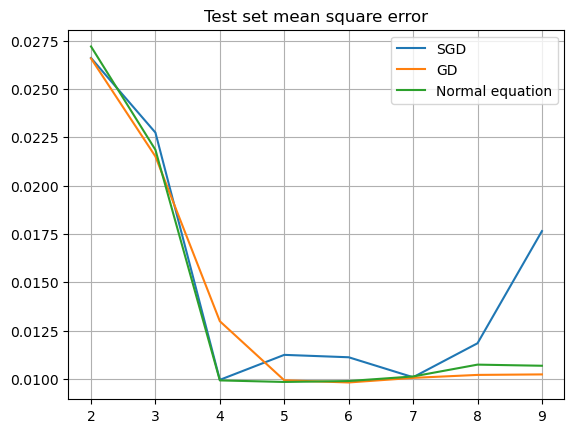

In [56]:
# Store errors of increasing k value
sgd_error = []
gd_error = []
nem_error = []

k_range = np.arange(2, 10, 1)
for k in k_range:
    sgd_theta_history, sgd_loss_history, sgd_grad_norm_history = SGD(
        loss=loss,
        grad_loss=grad_loss,
        D=(np.array(X_train), np.array(y_train)),
        theta0=np.zeros(k),
        alpha=0.5,
        batch_size=100,
        n_epochs=2000,
    )
    sgd_error.append(
        loss(sgd_theta_history[-1], np.array(X_test), np.array(y_test))
    )  # Computing and storing error for SGD

    gd_theta_history, _, f_val, grad_norm = gradient_descent(
        f=loss,
        grad_f=grad_loss,
        D=(np.array(X_train), np.array(y_train)),
        theta0=np.zeros(k),
        alpha=0.5,
        maxit=5000,
    )
    gd_error.append(
        loss(gd_theta_history[-1], np.array(X_test), np.array(y_test))
    )  # Computing and storing error for GD

    # Solving linear system threw cholesky factorization
    PhiX = vandermonde(X, k)
    L = np.linalg.cholesky(PhiX @ PhiX.T)
    z = np.linalg.solve(L, PhiX @ y)

    theta = np.linalg.solve(L.T, z)
    nem_error.append(
        loss(theta, np.array(X_test), np.array(y_test))
    )  # Computing and storing error for normal equation method

plt.plot(k_range, sgd_error, label="SGD")
plt.plot(k_range, gd_error, label="GD")
plt.plot(k_range, nem_error, label="Normal equation")
plt.title("Test set mean square error")
plt.legend()
plt.grid()

plt.show()

For increasing values of k up to 4 the test set error for all three models decreases rapidly as the model reduced underfitting. At k = 5 (real function degree) both GD and the normal equation method achieved their lowest error values. Beyond k = 5, the error started slightly increasing because of overfitting, the models started learning the noise. SGD exhibits a similar overall trend but shows occasional spikes, likely due to its stochastic nature and the absence of a stopping criterion for convergence, which sometimes results in poorer performance compared to the other methods.

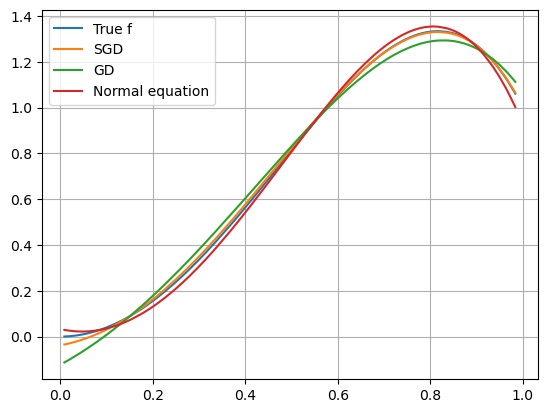

In [57]:
# Comparison for k = 5
k = 5

sgd_theta_history, sgd_loss_history, sgd_grad_norm_history = SGD(
    loss=loss,
    grad_loss=grad_loss,
    D=(np.array(X_train), np.array(y_train)),
    theta0=np.zeros(k),
    alpha=0.25,
    batch_size=100,
    n_epochs=3000,
)

gd_theta_history, it_count, f_val, grad_norm = gradient_descent(
    f=loss,
    grad_f=grad_loss,
    D=(np.array(X_train), np.array(y_train)),
    theta0=np.zeros(k),
    alpha=0.25,
    maxit=5000,
)

# Solving linear system threw cholesky factorization
PhiX = vandermonde(X, k)
L = np.linalg.cholesky(PhiX @ PhiX.T)
z = np.linalg.solve(L, PhiX @ y)

theta = np.linalg.solve(L.T, z)

sorted_X_test = np.sort(np.array(X_test))
theta_true = (0, 0, 4, 0, -3)

plt.plot(sorted_X_test, f(sorted_X_test, theta_true), label="True f")
plt.plot(sorted_X_test, f(sorted_X_test, sgd_theta_history[-1]), label="SGD")
plt.plot(sorted_X_test, f(sorted_X_test, gd_theta_history[-1]), label="GD")
plt.plot(sorted_X_test, f(sorted_X_test, theta), label="Normal equation")
plt.grid()
plt.legend()

plt.show()

In [58]:
print("||θ* - θ_SGD||_2 = " + str(np.linalg.norm(theta_true - sgd_theta_history[-1], 2)))
print("||θ* - θ_GD||_2 = " + str(np.linalg.norm(theta_true - gd_theta_history[-1], 2)))
print("||θ* - θ_NEM||_2 = " + str(np.linalg.norm(theta_true - theta, 2)))

||θ* - θ_SGD||_2 = 1.0740781813802112
||θ* - θ_GD||_2 = 2.388201681973465
||θ* - θ_NEM||_2 = 1.1785551682979267


For k=5, the best approximations of the true function were achieved using Stochastic Gradient Descent and the normal equation method. The normal equation method guarantees a solution close to optimal when the linear system is well-conditioned. By contrast, descent methods rely on iterative updates to converge to the solution, so their performance depends heavily on the choice of parameters. With different parameters, SGD could have yielded poorer results, or GD could have achieved better convergence.